<a href="https://colab.research.google.com/github/Mukeshvudayagiri/keep-coding-python/blob/main/Projects/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Medical Data Visualizer Project


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read csv
df = pd.read_csv('/content/sample_data/medical_examination.csv')
df.head()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
#add overweight column

df['overweight'] = (df['weight'] / (df['height']/100) ** 2).apply(lambda x : 1 if x > 25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [3]:
#Normalize data 

df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x == 1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [12]:
# Convert the data into long format and create a chart

df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
# print(df_cat)

df_cat['total'] = 1
df_cat
# df_cat = df_cat.groupby(['cardio','variable', 'value'], as_index=False).count()
# df_cat

# fig = sns.catplot(x='variable', y='total', data = df_cat, hue= 'value', kind= 'bar', col= 'cardio').fig
# # fig

,cardio,variable,value,total
0,0,cholesterol,0,1
1,1,cholesterol,1,1
2,1,cholesterol,1,1
3,1,cholesterol,0,1
4,0,cholesterol,0,1
...,...,...,...,...
419995,0,overweight,1,1
419996,1,overweight,1,1
419997,1,overweight,1,1
419998,1,overweight,1,1


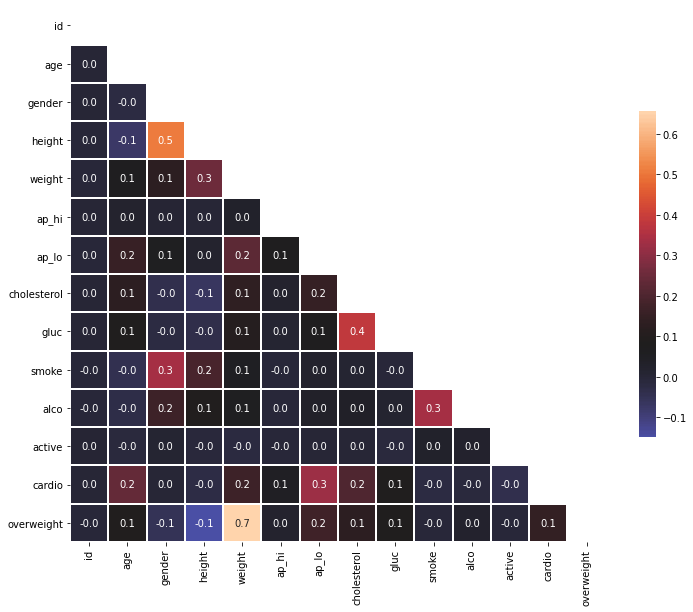

In [11]:
df_heat = df[
             (df['ap_lo'] <= df['ap_hi']) & 
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) & 
             (df['weight'] >= df['weight'].quantile(0.025)) & 
             (df['weight'] <= df['weight'].quantile(0.975))
             ]
# print(df_heat)

corr = df_heat.corr(method= 'pearson')
# corr

mask = np.triu(corr)
mask 

fig, ax = plt.subplots(figsize = (12,12))
# f, ax = plt.subplots(figsize=(7, 5))
# sns.heatmap(corr, mask=mask, vmax=.3, square=True)
sns.heatmap(corr,linewidths=1,annot=True,square=True, mask=mask, fmt='.1f', center=0.079999,cbar_kws={'shrink': 0.5})
